# Visibility Metrics for Typescript
<br>  

### References
- [Visibility Metrics and the Importance of Hiding Things](https://dzone.com/articles/visibility-metrics-and-the-importance-of-hiding-th)
- [Calculate metrics](https://101.jqassistant.org/calculate-metrics/index.html)
- [Controlling Access to Members of a Class](https://docs.oracle.com/javase/tutorial/java/javaOO/accesscontrol.html)
- [Neo4j Python Driver](https://neo4j.com/docs/api/python-driver/current)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from neo4j import GraphDatabase

In [2]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [3]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [4]:
# Main Colormap
main_color_map = 'nipy_spectral'

In [5]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.

driver = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))
driver.verify_connectivity()

In [6]:
def get_cypher_query_from_file(cypherFileName):
    with open(cypherFileName) as file:
        return ' '.join(file.readlines())

In [7]:
def query_cypher_to_data_frame(filename):
    records, summary, keys = driver.execute_query(get_cypher_query_from_file(filename))
    return pd.DataFrame([r.values() for r in records], columns=keys)

In [8]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [9]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

## Relative Visibility Of Elements

A Typescript element (variable, function, class, ...) may be exported in which case it is visible and can be imported everywhere (if there are no other rules defined). If there is no "export" keyword and the element (variable, function, class, ...) is only declared, then it is only visible within the file or module.

The relative visibility is the number of inner components that are visible outside (exported) divided by the number of all components:

$$ relative visibility = \frac{exported\:elements}{all\:declared\:elements} $$

Using directories with an index file as a module and exporting only the elements (variables, function, classes, ...) that the caller of the module should use is a good way to improve encapsulation and implementation detail hiding.

### How to apply the results

The relative visibility is between zero (no element is exported) and one (all elements are exported). A value lower than one means that there are elements that are not exported. The lower the value is, the better the encapsulation and the better the implementation details are hidden. 

Non exported elements can't be accessed from another modules so they can be changed without affecting code in other modules. They clearly indicate functionality that only belongs to one modules. This also motivates to split up code into smaller pieces with a dedicated reason to change (single responsibility).

### Table 1a - Top 40 projects with lowest median of module encapsulation

This table shows the relative visibility statistics aggregated for all modules per project and focusses on projects with many modules and hardly any non-exported elements (lowest median, high visibility). Module directories with an index file and intentional exporting helps to improve encapsulation.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Global_relative_visibility_statistics_for_elements_for_Typescript`

In [10]:
# Query the visibility statistics per project (all modules aggregated)
# The results will be used in multiple tables below.
relative_visibility_per_project_aggregated=query_cypher_to_data_frame("../cypher/Visibility/Global_relative_visibility_statistics_for_elements_for_Typescript.cypher")

In [11]:
# Sort by the "percentile50" (median) and "all" (number of modules in the project) descending
relative_visibility_statistics_highest_median=relative_visibility_per_project_aggregated.sort_values(by=['percentile50', 'all'], ascending=[False, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
relative_visibility_statistics_highest_median=relative_visibility_statistics_highest_median.reset_index(drop=True)

relative_visibility_statistics_highest_median.head(40)

,projectPath,all,exported,min,max,average,percentile25,percentile50,percentile75,percentile90,percentile95,percentile99
0,/home/runner/work/code-graph-analysis-pipeline...,30,34,1.133333,1.133333,1.133333,1.133333,1.133333,1.133333,1.133333,1.133333,1.133333
1,/home/runner/work/code-graph-analysis-pipeline...,14,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,/home/runner/work/code-graph-analysis-pipeline...,2,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,/home/runner/work/code-graph-analysis-pipeline...,1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,/home/runner/work/code-graph-analysis-pipeline...,5,4,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
5,/home/runner/work/code-graph-analysis-pipeline...,9,7,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778
6,/home/runner/work/code-graph-analysis-pipeline...,6,4,0.000000,1.000000,0.583333,0.375000,0.750000,0.875000,0.950000,0.975000,0.995000
7,/home/runner/work/code-graph-analysis-pipeline...,170,136,0.375000,0.898551,0.636775,0.505888,0.636775,0.767663,0.846196,0.872373,0.893315
8,/home/runner/work/code-graph-analysis-pipeline...,3,2,0.000000,1.000000,0.500000,0.250000,0.500000,0.750000,0.900000,0.950000,0.990000
9,/home/runner/work/code-graph-analysis-pipeline...,2,1,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


### Table 1b - Top 40 projects with highest median of module encapsulation

This table shows the relative visibility statistics aggregated for all modules per project and focusses on project with many modules and the highest median of non-exported elements (variables, functions, classes, ...) (low visibility). Module directories with an index file and intentional exporting helps to improve encapsulation.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Global_relative_visibility_statistics_for_elements_for_Typescript`

In [12]:
# Sort by the "percentile50" (median) ascending and "all" (number of packages in the artifact) descending
relative_visibility_statistics_lowest_median=relative_visibility_per_project_aggregated.sort_values(by=['percentile50', 'all'], ascending=[True, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
relative_visibility_statistics_lowest_median=relative_visibility_statistics_lowest_median.reset_index(drop=True)

relative_visibility_statistics_lowest_median.head(40)

,projectPath,all,exported,min,max,average,percentile25,percentile50,percentile75,percentile90,percentile95,percentile99
0,/home/runner/work/code-graph-analysis-pipeline...,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,/home/runner/work/code-graph-analysis-pipeline...,3,2,0.000000,1.000000,0.500000,0.250000,0.500000,0.750000,0.900000,0.950000,0.990000
2,/home/runner/work/code-graph-analysis-pipeline...,2,1,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
3,/home/runner/work/code-graph-analysis-pipeline...,170,136,0.375000,0.898551,0.636775,0.505888,0.636775,0.767663,0.846196,0.872373,0.893315
4,/home/runner/work/code-graph-analysis-pipeline...,6,4,0.000000,1.000000,0.583333,0.375000,0.750000,0.875000,0.950000,0.975000,0.995000
5,/home/runner/work/code-graph-analysis-pipeline...,9,7,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778
6,/home/runner/work/code-graph-analysis-pipeline...,5,4,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000
7,/home/runner/work/code-graph-analysis-pipeline...,14,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,/home/runner/work/code-graph-analysis-pipeline...,2,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,/home/runner/work/code-graph-analysis-pipeline...,1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Table 1 Chart 1 - Relative visibility in projects

/home/runner/miniconda3/envs/codegraph/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 640x480 with 0 Axes>

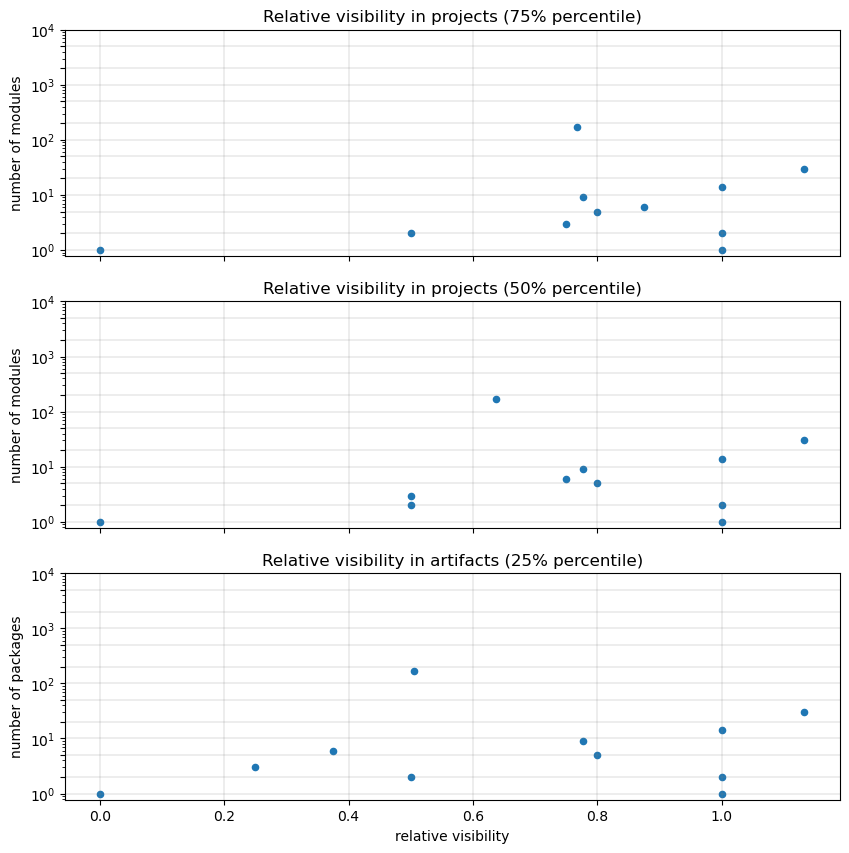

In [13]:
plot.figure();
fig, axes = plot.subplots(nrows=3, ncols=1, sharex=True)

number_of_modules_grid_ticks=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000, 2_000, 5_000, 10_000]

relative_visibility_per_project_aggregated.plot(
    ax=axes[0],
    kind='scatter',
    title='Relative visibility in projects (75% percentile)', 
    x='percentile75',
    y='all',
    grid=True,
    logy=True,
    yticks=number_of_modules_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of modules',
    cmap=main_color_map,
    figsize=(10,4),
)
relative_visibility_per_project_aggregated.plot(
    ax=axes[1],
    kind='scatter',
    title='Relative visibility in projects (50% percentile)', 
    x='percentile50',
    y='all',
    grid=True,
    logy=True,
    yticks=number_of_modules_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of modules',
    cmap=main_color_map,
    figsize=(10,4),
)
relative_visibility_per_project_aggregated.plot(
    ax=axes[2],
    kind='scatter',
    title='Relative visibility in artifacts (25% percentile)', 
    x='percentile25',
    y='all',
    grid=True,
    logy=True,
    yticks=number_of_modules_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of packages',
    cmap=main_color_map,
    figsize=(10,10),
)
axes[0].grid(color = 'grey', linestyle = '-', linewidth = 0.2)
axes[1].grid(color = 'grey', linestyle = '-', linewidth = 0.2)
axes[2].grid(color = 'grey', linestyle = '-', linewidth = 0.2)
plot.show()

### Table 2a - Top 40 modules with the highest visibility and lowest encapsulation

This table shows the relative visibility statistics per module and project and focusses on modules with many elements (variables, functions, classes, ...), hardly any non-exported ones and therefore the highest relative visibility (lowest encapsulation). Module directories with an index file and intentional exporting helps to improve encapsulation.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Relative_visibility_exported_elements_to_all_elements_per_module_for_Typescript`

In [14]:
# Query the visibility statistics per module and project (all elements aggregated)
# The results will be used in multiple tables below.
relative_visibility_per_module=query_cypher_to_data_frame("../cypher/Visibility/Relative_visibility_exported_elements_to_all_elements_per_module_for_Typescript.cypher")

In [15]:
# Sort by the "relativeVisibility" and "allElements" (number of elements in the module) descending
highest_relative_visibility_module=relative_visibility_per_module.sort_values(by=['relativeVisibility', 'allElements'], ascending=[False, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
highest_relative_visibility_module=highest_relative_visibility_module.reset_index(drop=True)

highest_relative_visibility_module.head(40)

,projectPath,modulePath,moduleName,exportedElements,allElements,relativeVisibility
0,/home/runner/work/code-graph-analysis-pipeline...,index.ts,react-router,14,14,1.000000
1,/home/runner/work/code-graph-analysis-pipeline...,src/images.ts,images,2,2,1.000000
2,/home/runner/work/code-graph-analysis-pipeline...,src/images.ts,images,2,2,1.000000
3,/home/runner/work/code-graph-analysis-pipeline...,src/auth.ts,auth,1,1,1.000000
4,/home/runner/work/code-graph-analysis-pipeline...,src/App.jsx,App,1,1,1.000000
5,/home/runner/work/code-graph-analysis-pipeline...,index.tsx,react-router-native,26,30,0.866667
6,/home/runner/work/code-graph-analysis-pipeline...,src/snkrs.ts,snkrs,4,5,0.800000
7,/home/runner/work/code-graph-analysis-pipeline...,src/todos.ts,todos,7,9,0.777778
8,/home/runner/work/code-graph-analysis-pipeline...,src/data.js,data,3,4,0.750000
9,/home/runner/work/code-graph-analysis-pipeline...,index.tsx,react-router-dom,70,138,0.507246


### Table 2b - Top 40 modules with the lowest visibility and highest encapsulation

This table shows the relative visibility statistics per modules and project and focusses on modules with many elements (variables, functions, classes, ...), many non-exported ones and therefore the lowest relative visibility (highest encapsulation). Non-exported elements help to improve encapsulation. Zero percent visibility and therefore modules with no exported elements are suspicious to contain dead code.

Only the top 40 entries are shown. The whole table can be found in the following CSV report:  
`Relative_visibility_public_types_to_all_types_per_package`

In [16]:
# Sort by the "relativeVisibility" ascending and "allTypes" (number of types in the package) descending
lowest_relative_visibility_modules=relative_visibility_per_module.sort_values(by=['relativeVisibility', 'allElements'], ascending=[True, False])

# Reset the index (row numbering starting at 0 and increasing by 1)
lowest_relative_visibility_modules=lowest_relative_visibility_modules.reset_index(drop=True)

lowest_relative_visibility_modules.head(40)

,projectPath,modulePath,moduleName,exportedElements,allElements,relativeVisibility
0,/home/runner/work/code-graph-analysis-pipeline...,src/pages/About.tsx,About,0,1,0.000000
1,/home/runner/work/code-graph-analysis-pipeline...,src/main.tsx,main,0,1,0.000000
2,/home/runner/work/code-graph-analysis-pipeline...,src/main.jsx,main,0,1,0.000000
3,/home/runner/work/code-graph-analysis-pipeline...,server.tsx,server,12,32,0.375000
4,/home/runner/work/code-graph-analysis-pipeline...,src/auth.ts,auth,1,2,0.500000
5,/home/runner/work/code-graph-analysis-pipeline...,index.tsx,react-router-dom,70,138,0.507246
6,/home/runner/work/code-graph-analysis-pipeline...,src/data.js,data,3,4,0.750000
7,/home/runner/work/code-graph-analysis-pipeline...,src/todos.ts,todos,7,9,0.777778
8,/home/runner/work/code-graph-analysis-pipeline...,src/snkrs.ts,snkrs,4,5,0.800000
9,/home/runner/work/code-graph-analysis-pipeline...,index.tsx,react-router-native,26,30,0.866667


### Table 2 Chart 1 - Relative visibility of modules

/home/runner/miniconda3/envs/codegraph/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 640x480 with 0 Axes>

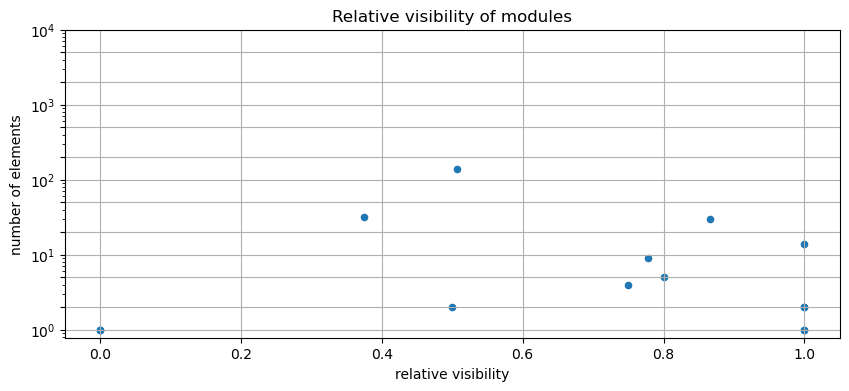

In [17]:
plot.figure();

number_of_types_grid_ticks=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000, 2_000, 5_000, 10_000]

relative_visibility_per_module.plot(
    kind='scatter',
    title='Relative visibility of modules', 
    x='relativeVisibility',
    y='allElements',
    grid=True,
    logy=True,
    yticks=number_of_types_grid_ticks,
    xlabel='relative visibility',
    ylabel='number of elements',
    cmap=main_color_map,
    figsize=(10,4),
)

plot.show()